Use this Excel file "test-data-generator.xlsx" to create a random set of aircraft which has 3 maintenance events each, all at ~24 month intervals. Copy the results to a file titled "test.xlsx

In [1]:
import pandas as pd

df = pd.read_excel('test.xlsx', verbose=True)
df = df.rename(columns={df.columns[0]: 'Aircraft', df.columns[1]: 'Date'})
df



Reading sheet 0


,Aircraft,Date
0,1,2024-01-01
1,1,2025-11-01
2,1,2027-09-01
3,2,2024-01-01
4,2,2026-02-01
...,...,...
121,41,2025-12-01
122,41,2027-12-01
123,42,2024-01-01
124,42,2025-10-01


### Create Maintenance events summary metrics to help sense check source data


Dataset contains: 42 unique aircraft
Dataset contains: 126 total events
Dataset contains: 21 unique dates
Dataset date range: 2024-01-01 – 2028-08-01 (4.6 years)


NameError: name 'plt' is not defined

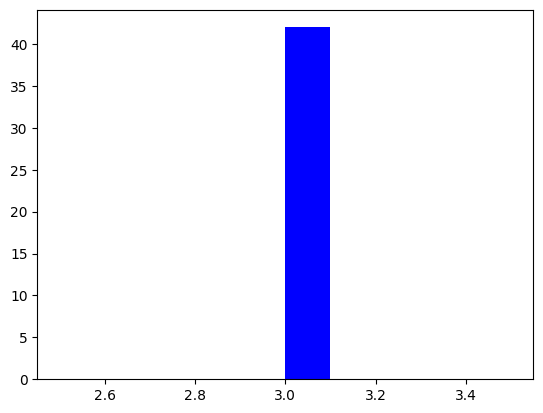

In [2]:
# Create some summary metrics

# Unique aircraft
num_unique_aircraft = df['Aircraft'].nunique()  # Count the number of unique aircraft
print(f"Dataset contains: {num_unique_aircraft} unique aircraft")  # Print the number of unique aircraft

# Count events
num_events = df['Date'].count()  # Count the number of events
print(f"Dataset contains: {num_events} total events")  # Print the number of total events

# Unique event dates
num_unique_dates = df['Date'].nunique()  # Count the number of unique event dates
print(f"Dataset contains: {num_unique_dates} unique dates")  # Print the number of unique dates


# Convert datetime to just date, removing time and find the min and max date
min_date, max_date = df['Date'].dt.date.agg(['min', 'max'])

# Calculate the number of years between min_date and max_date
num_years = (max_date - min_date).days / 365

print(f"Dataset date range: {min_date} – {max_date} ({num_years:.1f} years)")  # Print the date range

# Calculate the number of events per aircraft
events_per_aircraft = df.groupby('Aircraft').size()

# Plot a histogram of the number of events per aircraft
events_per_aircraft.hist(grid=False, color='blue')
plt.title("Number of Events per Aircraft")  # Setting the title of the plot
plt.xlabel("Number of Events")  # Setting the x-label of the plot
plt.ylabel("Frequency")  # Setting the y-label of the plot
plt.show()  # Displaying the plot


### Calculate Inspection Intervals from Maintenance Events

In [ ]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(df)

# Calculate the difference between consecutive dates for each aircraft
df['Difference'] = df.groupby('Aircraft')['Date'].diff()

# Convert the difference to months
df['Difference_in_Months'] = df['Difference'].dt.days / 30

# Calculate the mean and mode difference
mean_difference_in_months = round(df['Difference_in_Months'].mean(), 2)
print(f"The mean time between maintenance events is {mean_difference_in_months} months.")

mode_difference_in_months = round(df['Difference_in_Months'].mode()[0], 2)
print(f"The mode time between maintenance events is {mode_difference_in_months} months.")

std_difference_in_months = df['Difference_in_Months'].std()
print(f"The standard deviation of time between maintenance events is {std_difference_in_months:.2f} months.")


The mean time between maintenance events is 24.14 months.
The mode time between maintenance events is 23.33 months.
The standard deviation of time between maintenance events is 1.82 months.


The standard deviation is a measure of the amount of variation of a random variable expected about its mean.
- A low standard deviation indicates that the values tend to be close to the mean (aka, close to the expected value)
- A high standard deviation indicates that the values are spread out over a wider range.

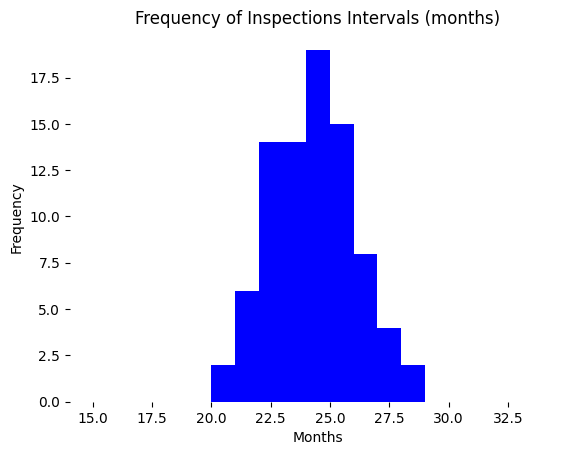

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting

# Plotting a histogram of the difference in months between maintenance events
df['Difference_in_Months'].dropna().hist(bins=range(int(df['Difference_in_Months'].min()-5), int(df['Difference_in_Months'].max()+5)+2), grid=False, color='blue')  # Creating a histogram
plt.title("Frequency of Inspections Intervals (months)")  # Setting the title of the plot
plt.xlabel("Months")  # Setting the x-label of the plot
plt.ylabel("Frequency")  # Setting the y-label of the plot
ax = plt.gca()  # Getting the current axes
ax.set_frame_on(False)  # Removing the frame
plt.show()  # Displaying the plot
